#**`This notebook is an Illustration to create a Logistic Regression Model with Sklearn using Python 🐍`**

For more information, check out [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

<img src="https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1534281070/linear_vs_logistic_regression_edxw03.png" height="230" width="470">

## **Setup**
Let's setup the imports:   

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# **Dataset**
Let's load the Credit Card Fraud Detection dataset which is uploaded on my Google Drive.

In [2]:
!gdown --id 1L2lovHw9nMDUg2ISuEX7Steciicoic30  

Downloading...
From: https://drive.google.com/uc?id=1L2lovHw9nMDUg2ISuEX7Steciicoic30
To: /content/creditcard.csv
151MB [00:01, 118MB/s] 


Let's read the CVS file: 

In [3]:
df = pd.read_csv('/content/creditcard.csv') 

First few rows in the DataFrame: 

In [4]:
df.head() 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Let's see if we have any null values:

In [5]:
df.isnull().sum() 

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.919560e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.688174e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.769071e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.782312e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552563e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.010663e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.694249e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.927028e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.137024e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


## Let's see the dataset distribution:

In [7]:
# The classes are heavily skewed we need to solve this issue later.
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100, 2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100, 2), '% of the dataset') 

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


That's hugely Imbalanced!

## Fraud Vs Non-Fraud

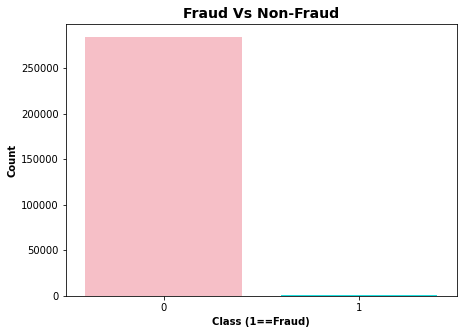

In [8]:
colors = ["#FFB6C1", 	"#00FFFF"]
plt.subplots(figsize = (7, 5)) 
sns.countplot(x = 'Class', data = df, palette=colors)
plt.title("Fraud Vs Non-Fraud", fontweight = 'bold', fontsize=14)
plt.xlabel('Class (1==Fraud)', fontweight = 'bold');
plt.ylabel('Count', fontweight = 'bold'); 

## Transaction Vs Time:

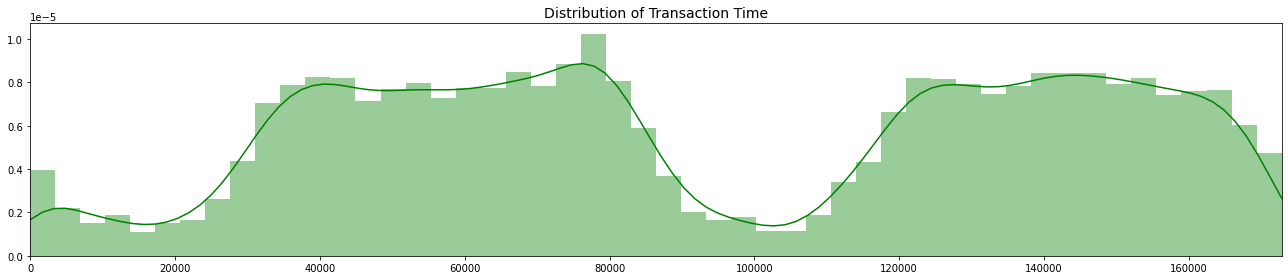

In [9]:
plt.subplots(figsize=(18,4))
time_val = df['Time'].values
sns.distplot(time_val, color='g')
plt.title('Distribution of Transaction Time', fontsize=14)
plt.xlim([min(time_val), max(time_val)])
plt.tight_layout()
plt.show();

Let's get our data ready for training:

In [10]:
x = df.drop(columns = 'Class', axis=1)
y = df['Class'].values

Lets split our dataset:

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

## Let's have a look at the shapes:

In [12]:
x_train.shape

(213605, 30)

In [13]:
y_train.shape

(213605,)

In [14]:
x_test.shape

(71202, 30)

In [15]:
y_test.shape

(71202,)

## Let's scale down our dataFrame using StandardScalar: 

In [16]:
sc = StandardScaler()
sc.fit_transform(x_train, y_train) 

array([[-0.73827037, -0.83952517,  0.73847641, ..., -0.64982719,
        -0.30113087, -0.19601641],
       [-1.03507885, -0.11917111, -0.2950571 , ...,  0.22137574,
         0.63682676, -0.10722282],
       [-1.33138188,  0.5785535 , -0.46388507, ..., -0.15076433,
         0.03581761,  0.08669645],
       ...,
       [-0.31591904, -0.07424934,  0.59727105, ..., -0.29905939,
        -0.59083121, -0.33041514],
       [-0.14456916, -1.50191272,  1.41496185, ...,  1.22948661,
         1.00911076, -0.34187489],
       [-0.38782028,  0.62876478, -0.47012345, ...,  0.00354724,
         0.11523561,  0.0946871 ]])

In [17]:
sc.fit(x_train, y_train) 

StandardScaler(copy=True, with_mean=True, with_std=True)

#Let's create a Pipeline.

This is just a more sophisticated way of writing code :)

In [18]:
lr = LogisticRegression() 
model = Pipeline([('standarize', sc), ('logisitic_regression', lr)]) 

In [19]:
model.fit(x_train, y_train) 

Pipeline(memory=None,
         steps=[('standarize',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logisitic_regression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

For Reference: [confusion](https://medium.com/@djocz/confusion-matrix-aint-that-confusing-d29e18403327)

## Let's plot the Train confusion Matrix: 

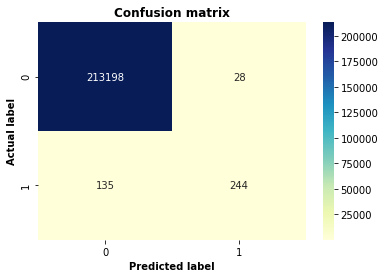

In [20]:
y_pred = model.predict(x_train)
cm = confusion_matrix(y_train, y_pred) 
sns.heatmap(cm, annot = True, cmap = 'YlGnBu', fmt='g'); 
plt.title('Confusion matrix', fontweight='bold')
plt.ylabel('Actual label', fontweight='bold')
plt.xlabel('Predicted label', fontweight='bold');

#Training Accuracy:

In [21]:
y_pred = model.predict(x_train)
train_accuracy = accuracy_score(y_train, y_pred)*100
print('Training accuracy: %.4f %%' % train_accuracy)

Training accuracy: 99.9237 %


For Reference: [confusion](https://medium.com/@djocz/confusion-matrix-aint-that-confusing-d29e18403327)

## Let's plot the Test confusion Matrix: 

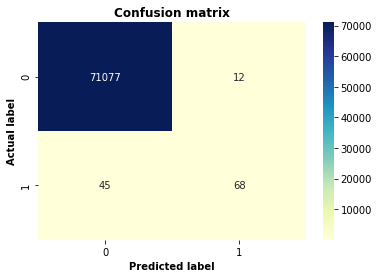

In [22]:
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred) 
sns.heatmap(cm, annot = True, cmap = 'YlGnBu', fmt='g'); 
plt.title('Confusion matrix', fontweight='bold')
plt.ylabel('Actual label', fontweight='bold')
plt.xlabel('Predicted label', fontweight='bold');

#Testing Accuracy: 

In [23]:
y_pred = model.predict(x_test)
test_accuracy = accuracy_score(y_test, y_pred)*100
print('Testing accuracy: %.4f %%' % test_accuracy)

Testing accuracy: 99.9199 %


## Let's see the Classification Report: 

In [24]:
print(classification_report(y_test, y_pred, digits=6))

              precision    recall  f1-score   support

           0   0.999367  0.999831  0.999599     71089
           1   0.850000  0.601770  0.704663       113

    accuracy                       0.999199     71202
   macro avg   0.924684  0.800801  0.852131     71202
weighted avg   0.999130  0.999199  0.999131     71202



## Summary

We just scratched the surface of sklearn and logistic regression.

##Where to go from here?

we could spent much more time with:

- feature selection / engineering (which is a bit hard without any background information about the features)

- we could try techniques to counter the data inbalance and
- we could use cross-validation to fine tune the hyperparameters (regulaziation constant C) or
- try a different regulization (Lasso/Elastic Net) or
- optimizer (stochastic gradient desent instead of coordinate descnet)
- adjust class weights to move the decision boundary (make missed frauds more expansive in the loss function)
- and finally we could try different classifer models in sklearn like decision trees, random forrests, knn, naive bayes or support vector machines.



## References
- [LR](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
- [Paper](http://journals.sfu.ca/cjhe/index.php/cjhe/article/download/183161/183136) 